In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import matplotlib.pyplot as plt

In [2]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## Load Model

In [3]:
rfModel = joblib.load('randomForestModel')

## Load Data

In [4]:
HKdata = pd.read_csv('HKCleaned.csv')

In [5]:
HKdataTest = HKdata[HKdata['clean_tweet'].notna()]

In [6]:
HKdataTest.shape

(347, 8)

## Tfidf vectorizer

In [7]:
HKcorpus = []
for i in range(HKdataTest.shape[0]):
    HKcorpus.append(HKdataTest.iloc[i][3])

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(HKcorpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
HKdf2 = pd.DataFrame(denselist, columns=feature_names)
HKdf2

,01,05,06,08yue,10,100,100kpw,107,12,14ri,...,zheng,zhi,zhuang,zi,ziaul,zimbabw,ziyashisumoretsutoshi,zola,zui,zuo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
HKPredict = rfModel.predict(HKdf2)

In [10]:
HKPredict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

In [11]:
HKdataFinal = HKdataTest[['text','retweet_count','favorite_count','Hash words','clean_tweet']]

In [12]:
HKdataFinal['indicator'] = HKPredict.tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


HKdataFinal

In [13]:
HKdataFinal['tweet_status'] = HKdataFinal.indicator.apply(lambda x : 'Neutral' if x == 2 else ('Offensive' if x == 1 else 'hate speech'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


HKdataFinal

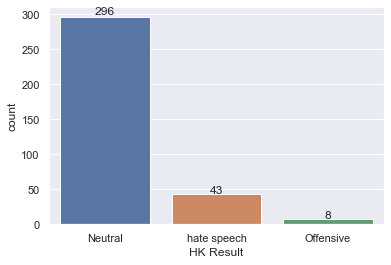

In [14]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="tweet_status", data=HKdataFinal)
ax.set(xlabel='HK Result')
show_values(ax)

In [15]:
pd.options.display.max_colwidth = 500

HKdataFinaloffensive = HKdataFinal['text'].loc[HKdataFinal['tweet_status'] == 'offensive']

In [16]:
HKdataFinaloffensive


Series([], Name: text, dtype: object)

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")

print(type(STOPWORDS))

import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

<class 'set'>


In [18]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(HKdataFinal.loc[HKdataFinal["tweet_status"]=="hate speech"].clean_tweet))

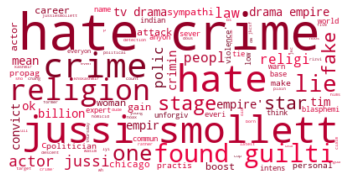

In [19]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

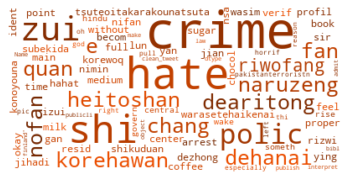

In [20]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(HKdataFinal.loc[HKdataFinal["tweet_status"]=="Offensive"].clean_tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

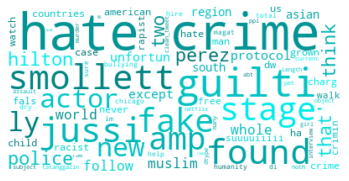

In [21]:
stopwords.add("Name")

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 180
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(HKdataFinal.loc[HKdataFinal["tweet_status"]=="Neutral"].clean_tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

## More Analysis

### build a table with columns: 'tweet_status', 'retweet count', 'fav_count', 'tweet'

In [22]:
HKdataFinal.groupby('tweet_status').mean()

,retweet_count,favorite_count,indicator
tweet_status,,,
Neutral,3.145270,18.229730,2.0
Offensive,6.500000,32.125000,1.0
hate speech,12.325581,49.302326,0.0


In [23]:
HKdataFinaloffensive = HKdataFinal.loc[HKdataFinal['tweet_status'] == 'hate speech']

In [24]:
HKdataFinaloffensive.sort_values('favorite_count',ascending = False)

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator,tweet_status
208,wakui took down doratake maitake and fuyutake in one arc damn this is a hate crime,428,1709,No hashtags,wakui took doratak maitak fuyutak one arc damn hate crime,0,hate speech
12,"USA: ‘Empire’ actor Jussie Smollett staged fake ‘hate crime’ to gain sympathy and boost career, found guilty of lyi… https://t.co/k7GWrJOvWs",69,206,No hashtags,"usa: 'empire' actor jussi smollett stage fake 'hate crime' gain sympathi boost career, found guilti lyi...",0,hate speech
239,There is a solution to this mob killing mess. Any one inciting hate speech against anyone from any forum should be… https://t.co/bvgGoaUrxz,16,118,No hashtags,there solut mob kill mess. ani one incit hate speech anyon forum be...,0,hate speech
40,"Jussie Smollett, Empire actor found guilty of faking hate crime, lying to Chicago Police https://t.co/JMWQfQNLV6",3,23,No hashtags,"jussi smollett, empir actor found guilti fake hate crime, lie chicago polic",0,hate speech
16,"Actor #JussieSmollett, one-time star of the TV drama #Empire, was found guilty of staging a hate crime against hims… https://t.co/ikTRNFdO4y",1,19,"#JussieSmollett, #Empire,","actor #jussiesmollett, one-tim star tv drama #empire, found guilti stage hate crime hims...",0,hate speech
261,@Whosanett ‘Teachers ask Hindutva students why they don’t hate Crime? \n\nIndian Journalist reveals how hate is taugh… https://t.co/1TFgs6mcJ3,9,10,No hashtags,'teacher ask hindutva student hate crime? indian journalist reveal hate taugh...,0,hate speech
183,Dm me your boobs if you hate #racism!,0,6,#racism!,dm boob hate #racism!,0,hate speech
151,@socialmedia5130 @Jaidev46142883 @HatePatroller @AgentSaffron @ifbychance__ one can hate a politician for political… https://t.co/ybWqP3rsAi,0,5,No hashtags,one hate politician political...,0,hate speech
323,Please everyone speak against everyone who committed this heinous crime.\n\nOoh sorry the whole nation is involved\nEv… https://t.co/a4u3KPo6NK,1,4,No hashtags,pleas everyon speak everyon commit heinou crime. ooh sorri whole nation involv ev...,0,hate speech
158,"Practising religion can be personal, propagating hate and blasphemy an unforgivable crime: JKCS #Kashmir #KnsKashmir https://t.co/7dDgnMAsyj",0,4,#Kashmir #KnsKashmir,"practis religion personal, propag hate blasphemi unforgiv crime: jkc #kashmir #knskashmir",0,hate speech


In [25]:
HKdataFinaloffensive = HKdataFinal.loc[HKdataFinal['tweet_status'] == 'Offensive']

HKdataFinaloffensive.sort_values('favorite_count',ascending = False)

,text,retweet_count,favorite_count,Hash words,clean_tweet,indicator,tweet_status
234,@MeghBulletin @myogiadityanath sir book this Jihadi under NSA.Wasim Rizwi is a resident of UP.UP police can arrest… https://t.co/B1VrphIAA6,34,153,No hashtags,sir book jihadi nsa.wasim rizwi resid up.up polic arrest...,1,Offensive
228,How can you have profiles without any verifications and proper identity …these mediums have become main center for… https://t.co/YeUfWbUI07,2,78,No hashtags,how profil without verif proper ident ...these medium becom main center for...,1,Offensive
205,これは完全なる憎悪犯罪 hate crime であり通常の犯罪ではない。ヘイト煽りを放っておいたからこうなった。これを軽い罪で終わらせてはいけない。厳しく断罪すべきだ。世論はhate crime に敏感に反応し、監視し、このような… https://t.co/mVMNief6he,13,22,No hashtags,"korehawan quan naruzeng e fan zui hate crime dearitong chang nofan zui dehanai. heitoshan riwofang tsuteoitakarakounatsuta. korewoq izui dezhong warasetehaikenai. yan shikuduan zui subekida. shi lun hahat crime nimin gan nifan ying shi, jian shi shi, konoyouna...",1,Offensive
345,The pic on the right is the reason for the horrific crime on the left. #PakistanTerroristNation has to be pulled up… https://t.co/RJTer3OYl2,2,4,#PakistanTerroristNation,the pic right reason horrif crime left. #pakistanterroristn pull up...,1,Offensive
241,"Okay I’m feeling down to the point that i did for myself a hate crime full of sugar \n“Some coffee,milk,chocolate an… https://t.co/gG33xLa2iv",0,0,No hashtags,"okay i'm feel point hate crime full sugar ""some coffee,milk,chocol an...",1,Offensive
250,By the time central government will wake up and do something about rising crime and hate against Hindus especially… https://t.co/CqE8zgi2dq,1,0,No hashtags,by time central govern wake someth rise crime hate hindu especially...,1,Offensive
329,This is a hate crime omg https://t.co/zwA4nAp7nm,0,0,No hashtags,thi hate crime oh god!,1,Offensive
347,Police publicly admitted their interpretation of Finland’s law would make publishing the #Bible a hate crime.\n\nhttps://t.co/urrUhzCJK0,0,0,#Bible,polic publicli admit interpret finland' law would make publish #bibl hate crime.,1,Offensive


### qualitative analysis

pip install text2emotion

In [26]:
HKdataFinal.reset_index(inplace = True)

In [27]:
import text2emotion as t2e

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Merlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Merlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Merlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
emoList = []

for i in range(HKdataFinal.shape[0]):
    emoDict = t2e.get_emotion(HKdataFinal['clean_tweet'][i])
    emoList.append(emoDict)

In [29]:
HKdataFinal['emotion'] = emoList

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
HKdataFinalWithEmo = pd.concat([HKdataFinal, pd.DataFrame(list(HKdataFinal['emotion']))], axis=1)

In [71]:
HKdataEmo = HKdataFinalWithEmo

In [72]:
HKdataEmo = HKdataEmo.melt(id_vars = 
               HKdataFinalWithEmo.columns[0:8], 
               value_vars = HKdataFinalWithEmo.columns[9:15],
               var_name = 'emotion', 
               value_name = 'emotion_score').sort_values('index')

In [74]:
HKdataEmoPieChart = HKdataEmo.groupby('emotion')['emotion_score'].sum()

Text(0.5, 1.0, 'Asian Countries Attitudes Towards Racism and Hate Crime')

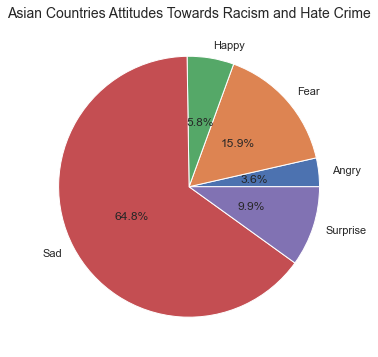

In [78]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = HKdataEmoPieChart.keys()
plt.pie(x=HKdataEmoPieChart, autopct="%.1f%%",labels=labels, pctdistance=0.5)
plt.title("Asian Countries Attitudes Towards Racism and Hate Crime", fontsize=14)

In [75]:
HKdataEmoPieChart

emotion
Angry        11.69
Fear         52.30
Happy        19.05
Sad         213.22
Surprise     32.68
Name: emotion_score, dtype: float64